<a href="https://colab.research.google.com/github/taaha3244/joy-of-supML/blob/main/Advertisement_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore")

# Load the dataset

In [ ]:
sales=pd.read_csv("D:/Exercises and Datasources/Datasets/Advertising/advertising.csv")

# Exploratory Data Analysis

In [ ]:
sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
sales.shape

(200, 4)

In [ ]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


More meaningful column names

In [ ]:
sales=sales.rename(columns={'TV':'TV Ads Expenditure','Radio':'Radio Ads Expenditure',
                           'Newspaper':'Newspaper Ads Expenditure'})

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TV Ads Expenditure         200 non-null    float64
 1   Radio Ads Expenditure      200 non-null    float64
 2   Newspaper Ads Expenditure  200 non-null    float64
 3   Sales                      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


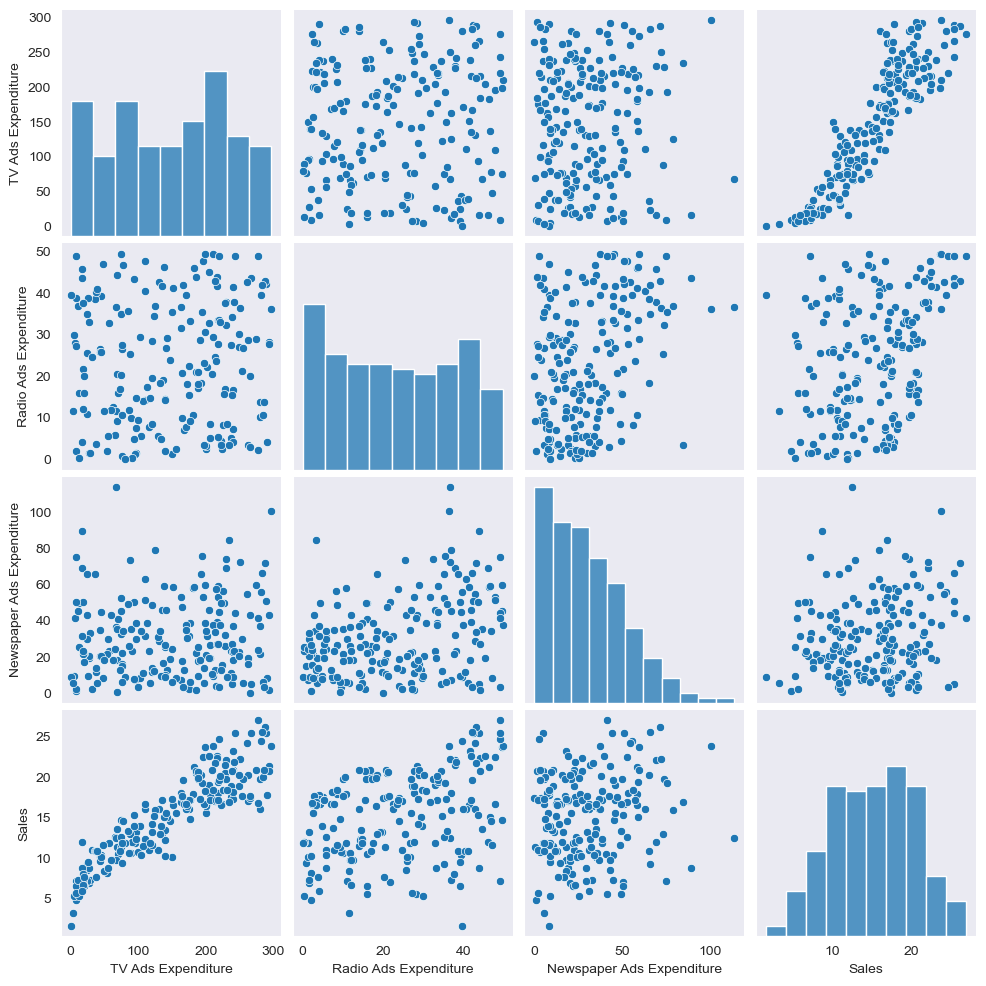

In [ ]:
sns.set_style('dark')
sns.pairplot(data=sales)
plt.show()

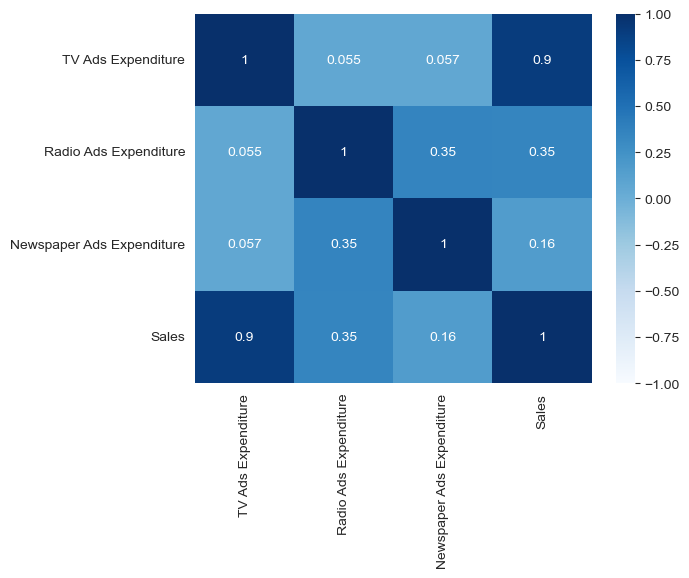

In [ ]:
sns.heatmap(sales.corr(),vmin=-1,vmax=1,cmap='Blues',annot=True)
plt.show()

Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

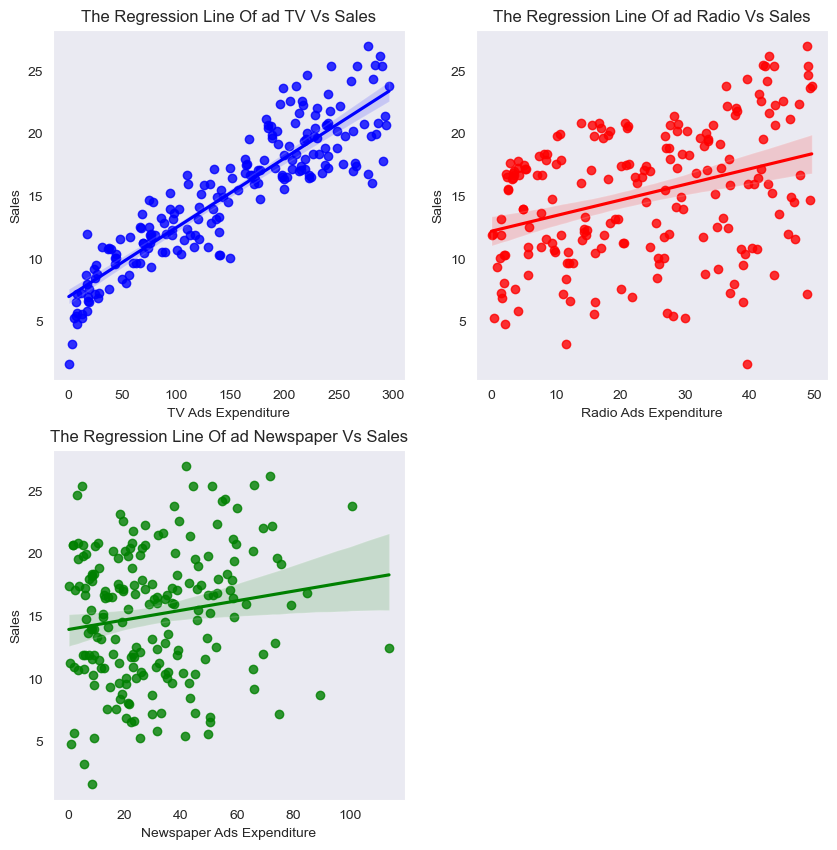

In [ ]:
# Plotting the regression line
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=sales,x='TV Ads Expenditure',y='Sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=sales,x='Radio Ads Expenditure',y='Sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=sales,x='Newspaper Ads Expenditure',y='Sales',color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')

# Features Selection

In [ ]:
X=sales.drop('Sales',axis=1)

In [ ]:
X.head()

,TV Ads Expenditure,Radio Ads Expenditure,Newspaper Ads Expenditure
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
X.shape

(200, 3)

In [ ]:
y=sales['Sales']

In [ ]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
y.shape

(200,)

# Creating the model

In [ ]:
from sklearn.model_selection import train_test_split
#splitting data set into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2
                                               ,random_state=42)

In [ ]:
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (160, 3)
y_train : (160,)
X_test : (40, 3)
y_test : (40,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#instantiating the model
linear=LinearRegression()
#Fitting data into the model i.e train data

linear.fit(X_train,y_train)

#predicting test data outcomes

y_pred=linear.predict(X_test)

In [ ]:
#actual vs predicted
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff.head()

,Actual,Predicted
95,16.9,17.034772
15,22.4,20.409740
30,21.4,23.723989
158,7.3,9.272785
128,24.7,21.682719


In [ ]:
y_pred.shape

(40,)

# Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


MSE=mean_squared_error(y_test,y_pred,squared=False)
MAE=mean_absolute_error(y_test,y_pred)
acc=linear.score(X_test,y_test)*100

In [ ]:
print(f'MAE is : {MAE},\nMSE is: {MSE}\nAccuracy is:{acc:.2f} %')

MAE is : 1.2748262109549344,
MSE is: 1.7052146229349232
Accuracy is:90.59 %
